SVR

In SVR we have to do the feature scalling as we dont have a ny specific equation to analyze so lets have a look at it


Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("/content/sample_data/Position_Salaries.csv")
dataset
X=dataset.iloc[:,1:-1].values
Y=dataset.iloc[:,-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

Now we have to change the Y format as X is in the 3d format and y is in the 1d format so we have to change the Y format bcz feature scalling want unique format for everyone so for x and y it should have unique format
do reshaping it.

In [7]:
Y=Y.reshape(-1,1)

In [8]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

Applying feature scalling so so to apply the class we need to create two objects of the class,one for x and one for y

In [10]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(X)
Y=sc_y.fit_transform(Y)

In [11]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [13]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Now applying the model in svm machine with the help of svr

In [15]:
from sklearn.svm import SVR
regression=SVR(kernel="rbf")
regression.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
sc_y.inverse_transform(regression.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

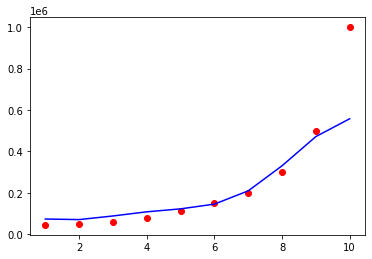

In [17]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color="red")
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regression.predict(X)),color="blue")

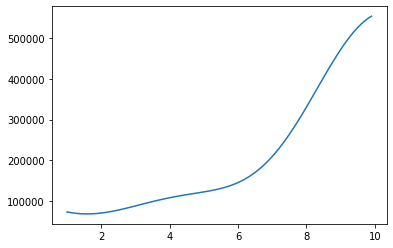

In [18]:
X_grid=np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.plot(X_grid,sc_y.inverse_transform(regression.predict(sc_x.transform(X_grid))))